In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [53]:
n = 100_000
x = stats.poisson(2).rvs(n)
x

array([2, 6, 0, ..., 1, 2, 1])

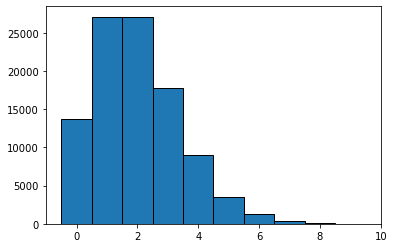

In [54]:
#Plot the chart
plt.hist(x, align='left', edgecolor='black', width=1)
plt.show()

### What is the probability that no cars drive up in the noon hour?

In [3]:
#Using a distribution model
stats.poisson(2).pmf(0)

0.1353352832366127

In [55]:
#Using a simulation
(x == 0).mean()

0.13712

### What is the probability that 3 or more cars come through the drive through?

In [4]:
stats.poisson(2).sf(2)

0.32332358381693654

In [56]:
#Using a simulation
(x >= 3).mean()

0.32091

### How likely is it that the drive through gets at least 1 car?

In [5]:
stats.poisson(2).sf(0)

0.8646647167633873

In [57]:
#Using a simulation
(x >= 1).mean()

0.86288

### Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

### What grade point average is required to be in the top 5% of the graduating class?

In [64]:
#Create a sample
x = stats.norm(3,.3).rvs(n)

In [69]:
stats.norm(3, .3).ppf(.95)

3.4934560880854417

In [70]:
stats.norm(3, .3).isf(.05)

3.4934560880854417

In [71]:
#Using a simulation
pd.DataFrame(x).quantile(.95)

0    3.497248
Name: 0.95, dtype: float64

### What GPA constitutes the bottom 15% of the class?

In [8]:
stats.norm(3, .3).ppf(.15)

2.689069983151863

In [72]:
#Using a simulation
pd.DataFrame(x).quantile(.15)

0    2.688381
Name: 0.15, dtype: float64

### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [42]:
#Find the range of the third decile (Bottom 20% - 30%)
stats.norm(3,.3).ppf(.2)

2.7475136299281258

In [43]:
stats.norm(3, .3).ppf(.3)

2.842679846187588

In [73]:
#Using a simulation
pd.DataFrame(x).quantile(.20)

0    2.747828
Name: 0.2, dtype: float64

In [74]:
#Using a simulation
pd.DataFrame(x).quantile(.30)

0    2.842439
Name: 0.3, dtype: float64

#### Yes, a student with a 2.8 GPA would qualify for the scholarhsip

### If I have a GPA of 3.5, what percentile am I in?

In [10]:
stats.norm(3, .3).cdf(3.5)

0.9522096477271853

In [75]:
#Using a simulation
(x <= 3.5).mean()

0.95092

#### You would be in the 95th percentile

### A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [77]:
#Create a sample
x = stats.binom(4326, .02).rvs(n)

In [11]:
stats.binom(4326, .02).sf(96)

0.1397582363130086

In [78]:
#Using a simulation
(x >= 97).mean()

0.13895

### You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

### What is the probability that at least one of your first 60 answers is correct?

In [85]:
#Create a sample
x = stats.binom(60, .01).rvs(n)

In [83]:
stats.binom(60, .01).sf(0)

0.4528433576092388

In [87]:
#Using a simulation
(x >= 1).mean()

0.45474

### The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [91]:
#Create a sample
x = stats.binom(60, .03).rvs(n)

In [16]:
#Chance it gets cleaned at least once each day
stats.binom((.9 * 66), .03).sf(0)

0.8342199288437355

In [92]:
#Using a simulation
(x >= 1).mean()

0.83751

In [19]:
#Chance that it goes 2 days without getting cleaned up
stats.binom(2, stats.binom((.9 * 66), .03).sf(0)).pmf(0)

0.02748303199257611

In [93]:
#Using a simulation. Will have to create a new sample
y = stats.binom(2, (x>=1).mean()).rvs(n)
(y == 0).mean()

0.02638

In [20]:
#Chance that it goes 5 days without getting cleaned up
stats.binom(5, stats.binom((.9 * 66), .03).sf(0)).pmf(0)

0.0001252165138809122

In [94]:
#Using a simulation
y = stats.binom(5, (x>=1).mean()).rvs(n)
(y == 0).mean()

6e-05

### You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [96]:
#Create a sample
x = stats.norm(15,3).rvs(n)

In [22]:
#Since we need 15 minutes to eat, we must have our food by minute 45
#Since it takes 10 minutes to get our food, we must order by minute 35
#Since each person takes 2 minutes to order, there can only be 16 other people
stats.norm(15,3).cdf(16)

0.6305586598182363

In [97]:
#Using a simulation
(x <= 16).mean()

0.62979

### Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [23]:
#import the SQL database info from the env.py file
from env import host, user, password

In [25]:
#Now connect to database and get current employee salary info
employees_url = f'mysql+pymysql://{user}:{password}@{host}/employees'
employees_query = "SELECT * FROM salaries WHERE to_date > CURDATE()"
employees = pd.read_sql(employees_query, employees_url)
employees

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [27]:
avg_salary = employees.salary.mean()
avg_salary

72012.23585730705

In [28]:
salary_stddev = employees.salary.std()
salary_stddev

17309.995380252043

### What percent of employees earn less than 60,000?

In [29]:
#Modeled with normal distribution:
stats.norm(avg_salary, salary_stddev).cdf(60_000)

0.24385742480214506

In [30]:
#Using actual values:
len(employees[employees.salary < 60_000]) / len(employees)

0.2705727041028802

### What percent of employees earn more than 95,000?

In [31]:
#Modeled with normal distribution:
stats.norm(avg_salary, salary_stddev).sf(95_000)

0.0920881919980413

In [33]:
#Using actual values:
len(employees[employees.salary > 95_000]) / len(employees)

0.1086272092752078

### What percent of employees earn between 65,000 and 80,000?


In [34]:
#Modeled with normal distribution
stats.norm(avg_salary, salary_stddev).cdf(80_000) - stats.norm(avg_salary, salary_stddev).cdf(65_000)

0.3350605685446655

In [35]:
#Using actual values
len(employees[(employees.salary >= 65_000) & (employees.salary <= 80_000)]) / len(employees)

0.32515700221552196

### What do the top 5% of employees make?

In [38]:
#Modeled with normal distribution
stats.norm(avg_salary, salary_stddev).ppf(.95)

100484.64454102785

In [40]:
#Same thing, but different method
stats.norm(avg_salary, salary_stddev).isf(.05)

100484.64454102787

In [41]:
#Using actual values
employees.salary.quantile(.95)

104225.84999999998